In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import gmean
import os
import statsmodels.api as sm
from pandas.tseries.offsets import MonthEnd
import warnings 
warnings.filterwarnings('always')
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA

# The code is written with the help of OpenAI's Chatgpt.com.

# Question 1-2: Asset Universe

In [3]:
# Set path and file names
folder_path = './data/'
file_list = [
    'spx_totret_1995_monthly.xlsx',         # US Equities
    'UST30Y_totret_1995_monthly.xlsx',   # US Government Bond
    'HY_totret_1995_monthly.xlsx',    # US HY Corporate Bonds
    'gsci_totret_1995_monthly.xlsx', # Global Commodities
    'EURHY_data.xlsx', # EUR Corporate Bonds
    'EUREQ_data.xlsx', # EUR Equities
    'FXY_data.xlsx', # USDJPY ETF Total Return
     'Gold_data.xlsx', # Gold

]

sheet_name = 'Worksheet'
col_name = 'TOT_RETURN_INDEX_GROSS_DVDS'
start_date = pd.to_datetime('2010-01-01')

# Initialize container for all standardized returns
standardized_df = pd.DataFrame()

# Loop over files
for file in file_list:
    filepath = os.path.join(folder_path, file)
    
    # Extract asset name from filename
    asset_name = file.split('_')[0].upper()  # 'spx_totret_1995_monthly.xlsx' → 'SPX'

    # Load and clean data
    df = pd.read_excel(filepath, sheet_name=sheet_name)
    df = df.rename(columns={col_name: 'Total_Return_Index'}).dropna()
    df = df[df['Date'] >= start_date].copy()
    df = df.set_index('Date')

    # Compute monthly returns
    df['Return'] = df['Total_Return_Index'].pct_change()
    df = df.dropna()

    # Compute mean and volatility
    monthly_returns = df['Return']
    mean_return = gmean(1 + monthly_returns) - 1
    vol_return = monthly_returns.std()

    # Standardize return
    df[f'{asset_name}'] = (monthly_returns - mean_return) / vol_return

    # Add to master DataFrame
    standardized_df = pd.concat([standardized_df, df[[f'{asset_name}']]], axis=1).dropna()

# Reset index to have 'Date' as column
standardized_df = standardized_df.reset_index()
standardized_df_1 = standardized_df
display(standardized_df_1.head())
display(standardized_df_1.tail())

,Date,SPX,UST30Y,HY,GSCI,EURHY,EUREQ,FXY,GOLD
0,2010-03-31,1.184608,-0.530763,1.277132,0.397559,-0.397344,1.062714,-1.739296,-1.106774
1,2010-04-30,0.122757,0.751679,0.892005,0.613177,2.199185,2.424337,-0.066530,-0.530417
2,2010-06-30,-1.500856,1.276440,0.357045,0.226211,-1.672478,-1.920082,1.157514,1.318014
3,2010-08-31,-1.329079,1.959475,-0.231386,-0.836337,-1.159306,-1.795480,1.144543,-0.884953
4,2010-09-30,1.873141,-0.658468,1.217676,1.565948,-0.644847,-0.866383,0.338207,-0.661408


,Date,SPX,UST30Y,HY,GSCI,EURHY,EUREQ,FXY,GOLD
124,2024-10-31,-0.469507,-1.289861,-0.512055,0.027249,-0.027333,0.617184,-1.902411,0.843801
125,2024-12-31,-0.821469,-1.450095,-0.456465,0.423074,-0.062569,-1.291312,-1.730543,-1.284009
126,2025-01-31,0.410162,-0.016282,0.416141,0.361181,-0.252903,-0.443162,0.640791,-0.269920
127,2025-02-28,-0.564339,1.250348,0.077880,-0.263806,0.643485,0.082555,1.252147,-1.789744
128,2025-03-31,-1.596070,-0.366401,-0.746498,0.426099,0.074357,-0.547447,0.215081,-1.015440


In [4]:
# Set path and file names
folder_path = './data/'
file_list = [
    'EEM_monthly_prices.xlsx', # Emerging Market Equities
    'VNQ_monthly_prices.xlsx', # US Real estate ETF
    'IGF_monthly_prices.xlsx', # Global Infrastructure ETF
     'unemp_data.xlsx', # US Unemployment
     'CPI_data.xlsx', # US Inflation (CPI)
]

sheet_name = 'Worksheet'
col_name = 'TOT_RETURN_INDEX_GROSS_DVDS'
start_date = pd.to_datetime('2010-01-01')

# Initialize container for all standardized returns
standardized_df = pd.DataFrame()

# Loop over files
for file in file_list:
    filepath = os.path.join(folder_path, file)
    
    # Extract asset name from filename
    asset_name = file.split('_')[0].upper()  # 'spx_totret_1995_monthly.xlsx' → 'SPX'

    # Load and clean data
    df = pd.read_excel(filepath, sheet_name=sheet_name)
    df = df.rename(columns={col_name: 'Total_Return_Index'}).dropna()
    df = df[df['Date'] >= start_date].copy()
    df = df.set_index('Date')

    # Compute monthly returns
    df['Return'] = df['Total_Return_Index'].pct_change()
    df = df.dropna()

    # Compute mean and volatility
    monthly_returns = df['Return']
    mean_return = gmean(1 + monthly_returns) - 1
    vol_return = monthly_returns.std()

    # Standardize return
    df[f'{asset_name}'] = (monthly_returns - mean_return) / vol_return

    # Add to master DataFrame
    standardized_df = pd.concat([standardized_df, df[[f'{asset_name}']]], axis=1).dropna()

# Reset index to have 'Date' as column
standardized_df_2 = standardized_df.reset_index()
standardized_df_2['Date'] = standardized_df_2['Date'] + MonthEnd()
display(standardized_df_2.head())
display(standardized_df_2.tail())

,Date,EEM,VNQ,IGF,UNEMP,CPI
0,2010-04-30,-0.074012,1.400736,-0.424852,0.025688,-0.714625
1,2010-05-31,-1.829766,-1.150317,-2.500427,-0.142828,-0.998445
2,2010-06-30,-0.431933,-1.297221,-0.806843,-0.090167,-0.960223
3,2010-07-31,2.177581,1.914237,2.759368,0.025688,-0.094147
4,2010-08-31,-0.658261,-0.371159,-0.551676,0.084849,-0.248542


,Date,EEM,VNQ,IGF,UNEMP,CPI
176,2024-12-31,-0.675763,-1.901995,-1.503414,-0.106718,0.578661
177,2025-01-31,0.695247,0.379335,0.640709,-0.109947,0.965750
178,2025-02-28,0.175860,0.583960,-0.005591,0.164715,0.015639
179,2025-03-31,0.173387,-0.813164,0.379334,0.161324,-0.991094
180,2025-04-30,-0.016264,-0.402441,0.581431,0.025688,0.034419


In [5]:
# Merge Dataframe
merged_df = pd.merge(standardized_df_1, standardized_df_2, on='Date', how='inner')
display(merged_df.head())
display(merged_df.tail())

,Date,SPX,UST30Y,HY,GSCI,EURHY,EUREQ,FXY,GOLD,EEM,VNQ,IGF,UNEMP,CPI
0,2010-04-30,0.122757,0.751679,0.892005,0.613177,2.199185,2.424337,-0.066530,-0.530417,-0.074012,1.400736,-0.424852,0.025688,-0.714625
1,2010-06-30,-1.500856,1.276440,0.357045,0.226211,-1.672478,-1.920082,1.157514,1.318014,-0.431933,-1.297221,-0.806843,-0.090167,-0.960223
2,2010-08-31,-1.329079,1.959475,-0.231386,-0.836337,-1.159306,-1.795480,1.144543,-0.884953,-0.658261,-0.371159,-0.551676,0.084849,-0.248542
3,2010-09-30,1.873141,-0.658468,1.217676,1.565948,-0.644847,-0.866383,0.338207,-0.661408,2.194769,0.553082,1.516725,0.025688,-0.190293
4,2010-11-30,-0.250416,-0.487142,-0.817480,0.333811,-0.712199,-1.170027,-1.319898,-0.400942,-0.595230,-0.481689,-1.337143,0.262329,0.157414


,Date,SPX,UST30Y,HY,GSCI,EURHY,EUREQ,FXY,GOLD,EEM,VNQ,IGF,UNEMP,CPI
123,2024-10-31,-0.469507,-1.289861,-0.512055,0.027249,-0.027333,0.617184,-1.902411,0.843801,-0.627407,-0.614365,-0.411725,0.025688,0.055486
124,2024-12-31,-0.821469,-1.450095,-0.456465,0.423074,-0.062569,-1.291312,-1.730543,-1.284009,-0.675763,-1.901995,-1.503414,-0.106718,0.578661
125,2025-01-31,0.410162,-0.016282,0.416141,0.361181,-0.252903,-0.443162,0.640791,-0.269920,0.695247,0.379335,0.640709,-0.109947,0.965750
126,2025-02-28,-0.564339,1.250348,0.077880,-0.263806,0.643485,0.082555,1.252147,-1.789744,0.175860,0.583960,-0.005591,0.164715,0.015639
127,2025-03-31,-1.596070,-0.366401,-0.746498,0.426099,0.074357,-0.547447,0.215081,-1.015440,0.173387,-0.813164,0.379334,0.161324,-0.991094


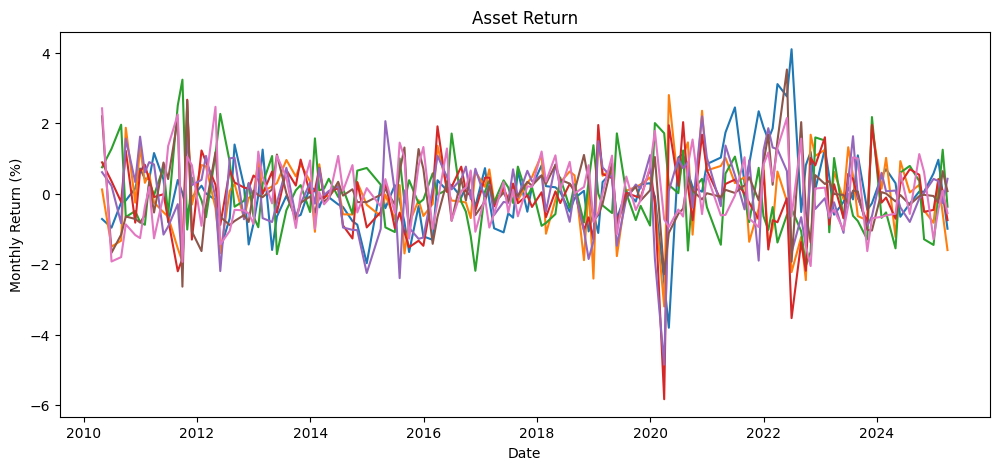

In [6]:
df_to_plot = merged_df
plt.figure(figsize=(12, 5))
plt.plot(df_to_plot['Date'], df_to_plot['CPI'], '-')
plt.plot(df_to_plot['Date'], df_to_plot['SPX'], '-')
plt.plot(df_to_plot['Date'], df_to_plot['UST30Y'], '-')
plt.plot(df_to_plot['Date'], df_to_plot['HY'], '-')
plt.plot(df_to_plot['Date'], df_to_plot['GSCI'], '-')
plt.plot(df_to_plot['Date'], df_to_plot['EURHY'], '-')
plt.plot(df_to_plot['Date'], df_to_plot['EUREQ'], '-')
plt.title('Asset Return')
plt.xlabel('Date')
plt.ylabel('Monthly Return (%)')
plt.show()

# Question 3-4: Macro Data Relevance

- From 2010-2024, empirically verify if the macro data series are relevant for the asset 
price series. You can do this via linear regression, as discussed in class, or via some 
other method. Explain and justify your approach. 

### Three-Variate Regression

In [8]:
def time_series_regression(portfolio, factors, resid = False,start = '2010-01-01',end = '2024-12-31', intercept = False):
    
    ff_report = pd.DataFrame(index=portfolio.columns)
    bm_residuals = pd.DataFrame(columns=portfolio.columns)
    factors_reg = factors[(factors.index >= start) & (factors.index <= end)]
    portfolio_reg = portfolio[(portfolio.index >= start) & (portfolio.index <= end)]

    if intercept:
        X = sm.add_constant(factors)

    for portf in portfolio_reg.columns:
        y = portfolio_reg[portf]
        if not intercept:
            res = sm.OLS(y, factors_reg, missing='drop').fit()

            ff_report.loc[portf, 'beta_gold'] = res.params.iloc[0]
            ff_report.loc[portf, 'beta_cpi'] = res.params.iloc[1]
            ff_report.loc[portf, 'beta_unemp'] = res.params.iloc[2]
        else:
            res = sm.OLS(y, X, missing='drop').fit()

            ff_report.loc[portf, 'constant'] = res.params.loc['const']
            ff_report.loc[portf, 'beta_gold'] = res.params.iloc[0]
            ff_report.loc[portf, 'beta_cpi'] = res.params.iloc[1]
            ff_report.loc[portf, 'beta_unemp'] = res.params.iloc[2]
            

        if resid:
            bm_residuals[portf] = res.resid # returns a Data Frame of residuals 

    if resid: # returns a Data Frame of residuals 
        return bm_residuals
        
    return ff_report

In [9]:
macro_factors = merged_df[['GOLD','CPI','UNEMP','Date']].set_index('Date')
assets = merged_df.drop(columns = ['GOLD','CPI','UNEMP']).set_index('Date')
time_series_regression = time_series_regression(assets, macro_factors, intercept = False)
display(time_series_regression)

,beta_gold,beta_cpi,beta_unemp
SPX,0.010160,0.079394,0.186411
UST30Y,-0.096065,-0.240880,-0.041710
HY,-0.002577,0.016904,0.091766
GSCI,0.065035,0.341934,0.061267
EURHY,0.177027,0.137664,-0.050167
EUREQ,0.278103,0.064784,-0.051801
FXY,-0.080475,-0.175266,-0.046094
EEM,0.007020,0.038555,0.079444
VNQ,-0.062745,-0.009838,0.084410
IGF,-0.030851,0.081587,0.095638


# Regression on Single Macro Variable (Single-Variate)

In [10]:
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import mean_squared_error

# Define y-values (assets)
asset_returns = pd.DataFrame({
    'SPX': merged_df['SPX'],
    'UST30Y': merged_df['UST30Y'],
    'HY': merged_df['HY'],
    'GSCI': merged_df['GSCI'],
    'EURHY': merged_df['EURHY'],
    'EUREQ': merged_df['EUREQ'],
    'FXY': merged_df['FXY'],
    'EEM': merged_df['EEM'],
    'VNQ': merged_df['VNQ'],
    'IGF': merged_df['IGF'],
})

asset_cols = asset_returns.columns.tolist()
macro_factors = ['GOLD', 'CPI', 'UNEMP']

# Prepare results
all_results = []

for asset in asset_cols:
    result = {'Asset': asset}
    for macro in macro_factors:
        temp_df = merged_df[[asset, macro]].dropna()
        X = temp_df[[macro]]
        y = temp_df[asset]

        model = sm.OLS(y, X).fit()

        result[f'beta_{macro.lower()}'] = model.params[macro]
        result[f'pval_{macro.lower()}'] = model.pvalues[macro] * 100
        result[f'R2_{macro.lower()}'] = model.rsquared * 100
    all_results.append(result)

# Combine into final DataFrame
compact_df = pd.DataFrame(all_results)

# Reorder columns: all betas → all pvals → all R2s
ordered_columns = ['Asset']
for stat in ['beta', 'pval', 'R2']:
    for macro in macro_factors:
        ordered_columns.append(f'{stat}_{macro.lower()}')

compact_df = compact_df[ordered_columns]
compact_df.set_index('Asset', inplace=True)

# Display final compact regression results
display(compact_df)


,beta_gold,beta_cpi,beta_unemp,pval_gold,pval_cpi,pval_unemp,R2_gold,R2_cpi,R2_unemp
Asset,,,,,,,,,
SPX,0.017812,0.013145,0.158341,84.639657,88.141776,3.559978,0.029661,0.017589,3.430747
UST30Y,-0.107802,-0.217933,0.040650,22.188980,0.922382,57.823768,1.172589,5.217683,0.244041
HY,-0.004775,-0.014186,0.085620,95.969144,87.550760,27.179625,0.002019,0.019401,0.950118
GSCI,0.062144,0.310964,-0.051049,50.647620,0.038159,50.910946,0.348275,9.494596,0.343987
EURHY,0.166773,0.156936,-0.101936,3.287719,3.623639,11.611766,3.534502,3.407669,1.932766
EUREQ,0.277205,0.090108,-0.086255,0.105438,27.553033,22.593503,8.131834,0.935511,1.152402
FXY,-0.097876,-0.150764,0.014702,28.085984,8.192053,84.496666,0.915085,2.363969,0.030223
EEM,-0.003964,0.007777,0.066669,96.801223,93.456541,41.385346,0.001271,0.005328,0.526433
VNQ,-0.069360,-0.037796,0.090176,46.772388,67.988688,25.262710,0.416004,0.134496,1.029214


# Question 5: Regression on Different Sample Period: Post-COVID Period

In [12]:
import statsmodels.api as sm
import pandas as pd

# Filter to post-COVID period
post_covid_df = merged_df[
    (merged_df['Date'] >= '2020-01-01') &
    (merged_df['Date'] <= '2024-12-31')
].copy()

# Define asset and macro columns
asset_cols = ['SPX', 'UST30Y', 'HY', 'GSCI', 'EURHY', 'EUREQ', 'FXY', 'EEM', 'VNQ', 'IGF']
macro_factors = ['GOLD', 'CPI', 'UNEMP']

# Collect regression results
all_results = []

for asset in asset_cols:
    result = {'Asset': asset}
    for macro in macro_factors:
        temp_df = post_covid_df[[asset, macro]].dropna()
        X = temp_df[[macro]]
        y = temp_df[asset]

        model = sm.OLS(y, X).fit()

        result[f'beta_{macro.lower()}'] = model.params[macro]
        result[f'pval_{macro.lower()}'] = model.pvalues[macro] * 100
        result[f'R2_{macro.lower()}'] = model.rsquared * 100
    all_results.append(result)

# Create DataFrame
compact_df = pd.DataFrame(all_results)

# Reorder columns: first all betas, then all pvals, then all R2s
macro_order = []
for stat in ['beta', 'pval', 'R2']:
    for macro in macro_factors:
        macro_order.append(f'{stat}_{macro.lower()}')

# Final DataFrame with grouped columns
compact_df = compact_df[['Asset'] + macro_order]
compact_df.set_index('Asset', inplace=True)

# Display final result
display(compact_df)


,beta_gold,beta_cpi,beta_unemp,pval_gold,pval_cpi,pval_unemp,R2_gold,R2_cpi,R2_unemp
Asset,,,,,,,,,
SPX,-0.094029,-0.091954,0.169386,67.503922,49.233106,7.277303,0.433010,1.157169,7.640101
UST30Y,-0.057704,-0.202756,0.033788,76.840480,7.808155,68.751385,0.213848,7.377648,0.398653
HY,0.097406,-0.102805,0.085788,69.498833,48.820745,41.925730,0.378851,1.179244,1.597803
GSCI,-0.054740,0.246956,-0.051150,80.311914,5.453111,58.643760,0.153344,8.721306,0.727997
EURHY,0.294222,0.204794,-0.102460,8.298970,4.226302,16.190261,7.150941,9.681198,4.715138
EUREQ,0.545211,0.091009,-0.081688,0.104506,38.918674,27.971066,23.297832,1.813990,2.843653
FXY,-0.055029,-0.214298,0.007138,77.733722,6.005774,93.187015,0.197248,8.358775,0.018044
EEM,-0.017188,-0.061030,0.062078,93.193279,61.162984,47.054164,0.018010,0.634490,1.277345
VNQ,0.061273,-0.035560,0.093037,79.493181,80.093148,35.511149,0.166648,0.156841,2.089040


# Question 6: Out-of-Sample Forecasting, Lagged/Led Variables

In [59]:
from sklearn.linear_model import LinearRegression

train_df = merged_df[(merged_df['Date'] < '2025-01-01') & (merged_df['Date'] >= '2020-01-01')].copy()
test_df = merged_df[merged_df['Date'] >= '2025-01-01'].copy()

forecast_results = []

for asset in asset_cols:
    for macro in macro_factors:

        X_train = train_df[[macro]].values
        y_train = train_df[asset].values

        model = LinearRegression(fit_intercept=False).fit(X_train, y_train)

        X_test = test_df[[macro]].values
        y_actual = test_df[asset].values
        y_pred = model.predict(X_test)

        error = y_actual - y_pred
        avg_error = np.mean(error)
        std_error = np.std(error)
        n = len(error)
        t_stat = (avg_error / (std_error / np.sqrt(n))) if n > 1 else np.nan

        forecast_results.append({
            'Asset': asset,
            'Macro': macro,
            'Beta': model.coef_[0],
            'Avg Forecast Error': avg_error,
            'Std Dev of Error': std_error,
            'T-Stat (Error)': t_stat,
            'Direction': 'Leading' if avg_error > 0 else 'Lagging'
        })

forecast_df = pd.DataFrame(forecast_results)

leading_df = forecast_df[forecast_df['Direction'] == 'Leading'].sort_values(by='Avg Forecast Error', ascending=False)
lagging_df = forecast_df[forecast_df['Direction'] == 'Lagging'].sort_values(by='Avg Forecast Error')

print("Leading Assets (2025 YTD):")
display(leading_df)

print("Lagging Assets (2025 YTD):")
display(lagging_df)


Leading Assets (2025 YTD):


,Asset,Macro,Beta,Avg Forecast Error,Std Dev of Error,T-Stat (Error),Direction
20,FXY,UNEMP,0.007138,0.702159,0.425532,2.858007,Leading
19,FXY,CPI,-0.214298,0.701980,0.521740,2.330405,Leading
18,FXY,GOLD,-0.055029,0.646266,0.406240,2.755431,Leading
12,EURHY,GOLD,0.294222,0.456567,0.551668,1.433465,Leading
27,IGF,GOLD,0.049804,0.389201,0.234721,2.871991,Leading
22,EEM,CPI,-0.061030,0.347967,0.288423,2.089626,Leading
23,EEM,UNEMP,0.062078,0.343693,0.253414,2.349093,Leading
28,IGF,CPI,0.010362,0.338184,0.262363,2.232598,Leading
29,IGF,UNEMP,0.071771,0.332981,0.273008,2.112536,Leading
21,EEM,GOLD,-0.017188,0.330546,0.254641,2.248355,Leading


Lagging Assets (2025 YTD):


,Asset,Macro,Beta,Avg Forecast Error,Std Dev of Error,T-Stat (Error),Direction
0,SPX,GOLD,-0.094029,-0.679799,0.848482,-1.387709,Lagging
2,SPX,UNEMP,0.169386,-0.595617,0.837803,-1.231361,Lagging
1,SPX,CPI,-0.091954,-0.583713,0.892622,-1.132641,Lagging
16,EUREQ,CPI,0.091009,-0.302390,0.272860,-1.919503,Lagging
17,EUREQ,UNEMP,-0.081688,-0.296801,0.279775,-1.837451,Lagging
8,HY,UNEMP,0.085788,-0.090338,0.496255,-0.315303,Lagging
7,HY,CPI,-0.102805,-0.084492,0.568719,-0.257321,Lagging


# Question 9-11: PCA Analysis

In [30]:
# PCA Analysis Prep: Dataframe has to have date as index, each column is values for each variable (e.g., asset)
df_for_pca = merged_df.set_index('Date').loc['2020-01-01':].drop(columns = ['CPI','UNEMP','GOLD'])
display(df_for_pca.head())

,SPX,UST30Y,HY,GSCI,EURHY,EUREQ,FXY,EEM,VNQ,IGF
Date,,,,,,,,,,
2020-01-31,-0.262767,2.005297,-0.235979,-1.842642,1.043825,1.784505,0.195442,-0.831353,0.318127,0.529825
2020-03-31,-3.196669,1.718557,-5.826785,-4.842842,-2.277303,-0.727193,0.215871,-3.043053,-3.968693,-5.194979
2020-04-30,2.801357,0.252849,1.944151,0.084523,-1.108310,-0.940082,0.157114,1.356954,1.757425,1.634944
2020-06-30,0.220501,0.017024,0.227657,0.993808,-0.570047,-0.447314,0.056731,1.097364,0.146462,-0.559657
2020-07-31,1.090199,1.230094,2.032946,0.726506,-0.419633,-0.645397,0.828892,1.647299,0.769898,0.633568


,1,2,3,4,5,6,7,8,9,10
Variation Explained,57.17%,16.71%,11.71%,4.77%,2.35%,2.05%,1.91%,1.37%,1.14%,0.82%


,1,2,3,4,5,6,7,8,9,10
Cumulative Variation Explained,57.17%,73.87%,85.59%,90.36%,92.71%,94.76%,96.67%,98.04%,99.18%,100.00%


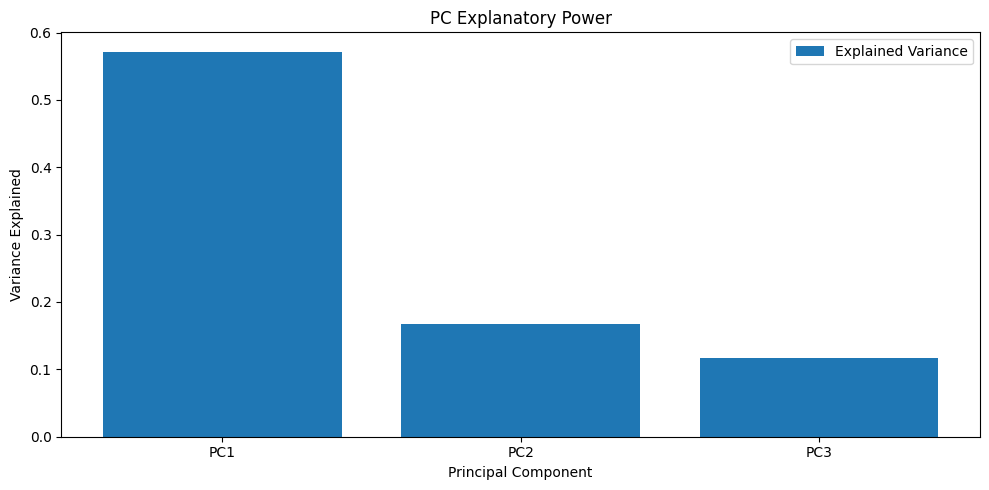

In [50]:
# Extract the explained variance ratios for the first 5 principal components and add the cumulative explained variance ratio. 
# Plot the results using a bar plot.

# PCA Analysis

# Compute principal components using a full Singular Value Decomposition (SVD)
pca = PCA(svd_solver='full')
# Fits the PCA model to the dataset
pca.fit(df_for_pca)
loadings = pca.components_[:3, :].T

# Make a new dataframe for the Variation Explained by each Principal Component
pca_var_explained = pd.DataFrame(pca.explained_variance_ratio_, columns=['Variation Explained']).T
pca_var_explained.columns = list(np.arange(1, 11, 1))
display(pca_var_explained.style.format('{:.2%}'.format))

# PCA Vectors
pca_transformed = pca.fit_transform(df_for_pca)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
pca_cum_var_explained = pd.DataFrame(cumulative_variance, columns=['Cumulative Variation Explained']).T
pca_cum_var_explained.columns = list(np.arange(1, 11, 1))
display(pca_cum_var_explained.style.format('{:.2%}'.format))

# Bar Graph
x_axis_values = ['PC1', 'PC2', 'PC3']
y_axis_values = pca.explained_variance_ratio_[:3] # Not cumulative
# y_axis_values = np.cumsum(pca.explained_variance_ratio_)[:3] # Cumulative

plt.figure(figsize=(10, 5))
plt.bar(x_axis_values, y_axis_values, label='Explained Variance')
plt.title('PC Explanatory Power')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.legend()
plt.tight_layout()
plt.show()

In [51]:
# Display and plot the (factor loadings of the) first 3 principal components.

# Factor Loadings (use the appropriate dataframe)
pca_wts = pd.DataFrame(pca.components_, columns=df_for_pca.columns)
pca_wts.index = ['PC_1','PC_2','PC_3', 
                 'PC_4',
                 'PC_5',
                 'PC_6',
                 'PC_7',
                 'PC_8',
                 'PC_9',
                 'PC_10'
                 ]
df_factor_loadings = pca_wts.head(3).style.format('{:.2f}')
display(df_factor_loadings)

,SPX,UST30Y,HY,GSCI,EURHY,EUREQ,FXY,EEM,VNQ,IGF
PC_1,0.40,0.12,0.45,0.26,0.07,0.05,0.18,0.35,0.43,0.45
PC_2,0.02,0.59,-0.04,-0.52,-0.34,-0.18,0.44,0.09,0.11,-0.11
PC_3,-0.26,0.26,-0.15,-0.02,0.53,0.65,0.34,0.07,-0.10,0.07


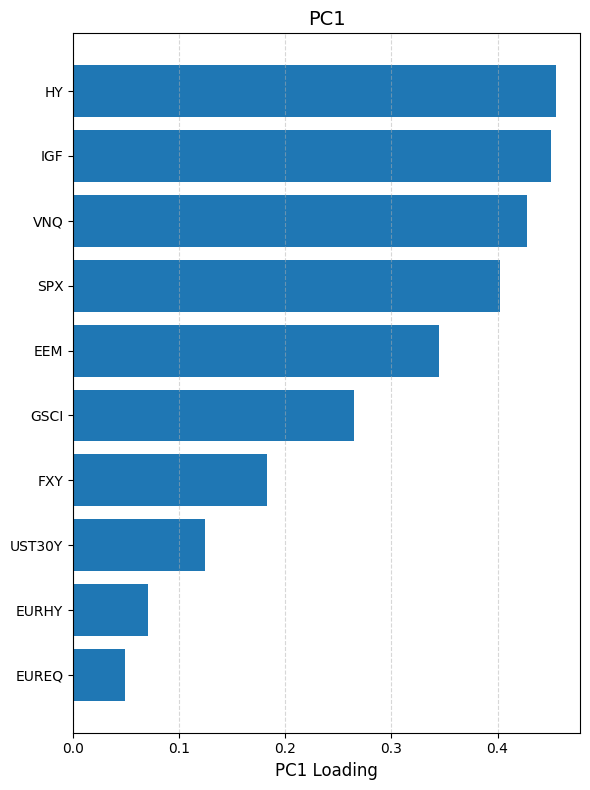

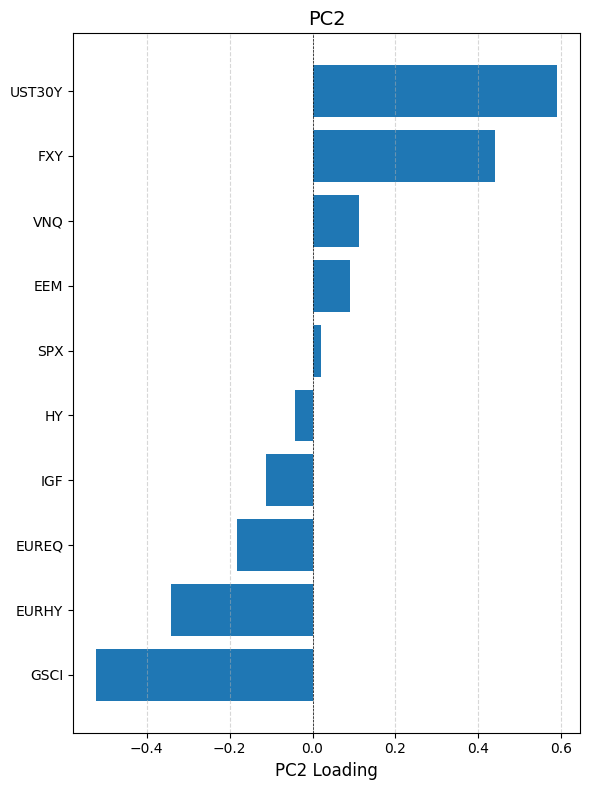

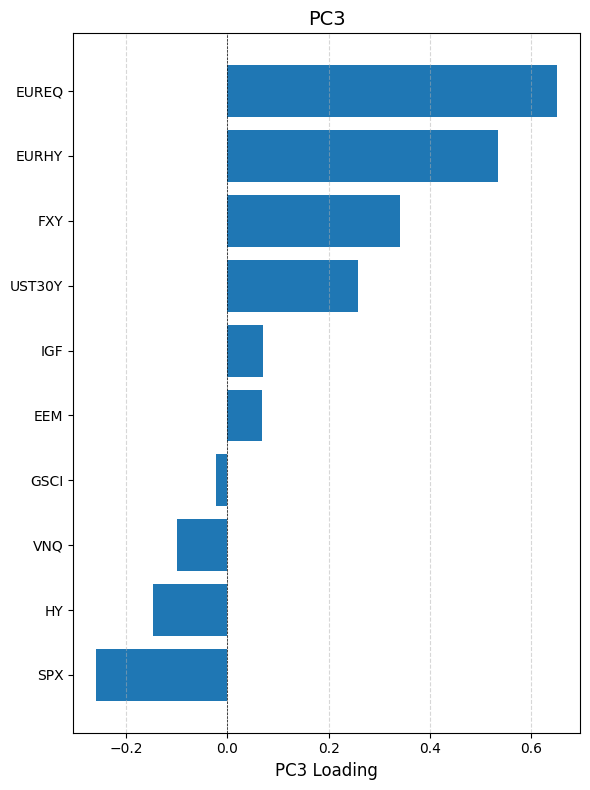

In [52]:
# Grab data in each row
row_list = [0, 1, 2]

for row in row_list: 
    # Take relevant PC (e.g., PC1), transpose and sort by value descending
    df_factor_loadings = pca_wts.iloc[[row]].T  # First row, transposed
    df_factor_loadings.columns = [f'PC{row+1}']    # Rename the column for clarity
    df_factor_loadings = df_factor_loadings.sort_values(by=f'PC{row+1}', ascending=True)

    # Plot horizontal bar chart
    plt.figure(figsize=(6, 8))
    plt.barh(df_factor_loadings.index, df_factor_loadings[f'PC{row+1}'])

    plt.title(f'PC{row+1}', fontsize=14)
    plt.xlabel(f'PC{row+1} Loading', fontsize=12)
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # y-axis at 0
    plt.grid(True, axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [67]:

test_df = merged_df[merged_df['Date'] >= '2025-01-01'].copy().drop(columns = ['GOLD','UNEMP','CPI']).set_index('Date')
tr = train_df.drop(columns = ['GOLD','UNEMP','CPI']).set_index('Date')
train = tr @ loadings 
test = test_df @ loadings 
# Here we transform the initial data to obtain the PC values throughout the two samples. 
asset_cols = test_df.columns
forecast_results = []

for asset in asset_cols:
    for PC in train.columns:

        X_train = train[[PC]].values
        y_train = tr[asset].values

        model = LinearRegression(fit_intercept=False).fit(X_train, y_train)

        X_test = test[[PC]].values
        y_actual = test_df[asset].values
        y_pred = model.predict(X_test)

        error = y_actual - y_pred
        avg_error = np.mean(error)
        std_error = np.std(error)
        n = len(error)
        t_stat = (avg_error / (std_error / np.sqrt(n))) if n > 1 else np.nan

        forecast_results.append({
            'Asset': asset,
            'PC': PC+1,
            'Beta': model.coef_[0],
            'Avg Forecast Error': avg_error,
            'Std Dev of Error': std_error,
            'T-Stat (Error)': t_stat,
            'Direction': 'Leading' if avg_error > 0 else 'Lagging'
        })

forecast_df = pd.DataFrame(forecast_results)

leading_df = forecast_df[forecast_df['Direction'] == 'Leading'].sort_values(by='Avg Forecast Error', ascending=False)
lagging_df = forecast_df[forecast_df['Direction'] == 'Lagging'].sort_values(by='Avg Forecast Error')

print("Leading Assets (2025 YTD):")
display(leading_df)

print("Lagging Assets (2025 YTD):")
display(lagging_df)

Leading Assets (2025 YTD):


,Asset,PC,Beta,Avg Forecast Error,Std Dev of Error,T-Stat (Error),Direction
18,FXY,1,0.182340,0.661184,0.356034,3.216559,Leading
20,FXY,3,0.332219,0.569140,0.321781,3.063512,Leading
19,FXY,2,0.436382,0.536118,0.130189,7.132565,Leading
28,IGF,2,-0.116183,0.382494,0.219875,3.013066,Leading
10,GSCI,2,-0.522218,0.373807,0.116061,5.578541,Leading
23,EEM,3,0.067156,0.321172,0.281307,1.977503,Leading
22,EEM,2,0.082095,0.316831,0.257374,2.132178,Leading
29,IGF,3,0.072442,0.309033,0.312246,1.714227,Leading
13,EURHY,2,-0.354881,0.290427,0.566806,0.887490,Leading
21,EEM,1,0.344463,0.269787,0.209144,2.234275,Leading


Lagging Assets (2025 YTD):


,Asset,PC,Beta,Avg Forecast Error,Std Dev of Error,T-Stat (Error),Direction
0,SPX,1,0.399109,-0.674227,0.459380,-2.542115,Lagging
1,SPX,2,0.017069,-0.589930,0.814414,-1.254631,Lagging
17,EUREQ,3,0.665658,-0.570241,0.245374,-4.025226,Lagging
2,SPX,3,-0.248113,-0.483688,0.772568,-1.084400,Lagging
15,EUREQ,1,0.050020,-0.314066,0.263482,-2.064571,Lagging
16,EUREQ,2,-0.182577,-0.233000,0.396517,-1.017782,Lagging
6,HY,1,0.456112,-0.187941,0.068014,-4.786143,Lagging
7,HY,2,-0.035740,-0.070518,0.503279,-0.242690,Lagging
14,EURHY,3,0.531891,-0.058810,0.029935,-3.402794,Lagging
24,VNQ,1,0.427244,-0.047170,0.316691,-0.257982,Lagging
